In [10]:
cd /Users/leayamashiro/whispering_gallery_MAIN/WGM_clean

/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean


In [93]:
import numpy as np
import pandas as pd 
import cmath 
import glob
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 8
#import VNA_data_read_local as vdr


import sys
sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_analysis/')
import useful_functions as uf
#sys.path.append('/Users/leayamashiro/whispering_gallery_MAIN/WGM_clean/analysis_060225')
import VNA_data_read_local as vdr
# loading file folder
rot_060325 = glob.glob('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/*.txt')
rot_060325

['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt']

In [ ]:
baseline, rot1_1p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt', 
                                    'data/dist_rot_data_060325', title = '1 mm')


baseline, rot1_2p5 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt', 
                                    'data/dist_rot_data_060325', title = '2.5 mm')

baseline, rot1_5p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt', 
                                    'data/dist_rot_data_060325', title = '5 mm')


baseline, rot1_7p5 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt', 
                                    'data/dist_rot_data_060325', title = '7.5 mm')


baseline, rot1_10p0 = vdr.loader_plotter('baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt', 
                                    'rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt', 
                                    'data/dist_rot_data_060325', title = '10 mm')
    

In [ ]:
rot1_distances = [rot1_1p0, rot1_2p5, rot1_5p0, rot1_7p5, rot1_10p0]
for i in range(len(rot1_distances)): 
    S21_dips = uf.find_plot_dips(baseline, rot1_distances[i], n_dips = 6, f_start=3, 
                                 f_stop=4.2, title = 'Step ' + str(i + 1))

In [ ]:
for i in range(len(rot1_distances)): 
    S21_dips = uf.find_plot_dips(baseline, rot1_distances[i], n_dips = 6, 
                                 title = 'Step ' + str(i + 1))

For rotations 1, 5, and 7, I have data for the whole 2.5 to 9.86 GHz band. 
For rotations 1, 3, 5, and 7, I have data for the 2.5 to 6.18 GHz band, as well as the "super close" measurement from 2.5 to 9.86 GHz. 

In [15]:
# BASELINE: 

baseline_data = uf.just_single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

### Start with Rotation 1, trial 1

In [51]:
rot1_060325 = glob.glob('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/*.txt')

In [52]:
rot1_060325

['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_0mm_2.5to6.18GHz_2025-06-03_17-44-11.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060

In [ ]:
def load_subtract_getfreqs(baseline_filename, disk_res_filename, folder): 
    # loading in
    folder_path = '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/' + folder + '/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    # separating into arrays
    freqs = np.array(1e9*baseline_data['Freq (Hz)'])
    baseline = np.array(20*np.log10(np.abs(baseline_data['Complex (decimal)'])))
    disk = np.array(20*np.log10(np.abs(disk_resonance_data['Complex (decimal)'])))
    baseline_subtracted = np.array(disk - baseline)
    return freqs, baseline, disk, baseline_subtracted

In [19]:
def extract_dist_for_reading(filename):
    # Get file name
    name = filename.split('/')[-1]
    # Find the part that starts with 'rot1_'
    part = name.split('_')  
    for p in part:
        if 'mm' in p:
            return float(p.replace('mm', ''))
    return float('inf')  # for other naming conventions put at end

# trying out function
rot1_060325_sorted = sorted(rot1_060325, key=extract_dist_for_reading)

# Print result
for f in rot1_060325_sorted:
    print(f)

/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt
/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt
/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt
/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt
/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt


In [20]:
rot1_060325_sorted

['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_10mm_2.5to6.18GHz_2025-06-03_15-51-29.txt']

In [92]:
def extract_dist_for_reading(filename): # just pulls out the distance number from filename
        # Get file name
        name = filename.split('/')[-1]
        # Find the part that starts with 'rot1_'
        part = name.split('_')  
        for p in part:
            if 'mm' in p:
                return float(p.replace('mm', ''))
        return float('inf')  # for other naming conventions put at end

def read_glob_sort_get_data(glob_folder_path, baseline_filepath): 

    folder_files = glob.glob(glob_folder_path + '/*.txt')

    rot_data_dict = {} # initialize dictionary 
    dist_sorted = sorted(folder_files, key=extract_dist_for_reading) # sort filename strings by distance naming
    baseline_data = pd.read_csv(baseline_filepath) # read in baseline and (next line) clean .txt file
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)

    for i in range(len(dist_sorted)):
        # set up disk data
        disk_resonance_data = pd.read_csv(dist_sorted[i])
        disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
        # separating into arrays
        freqs = np.array(1e9*baseline_data['Freq (Hz)'])
        baseline = np.array(20*np.log10(np.abs(baseline_data['Complex (decimal)'])))
        disk = np.array(20*np.log10(np.abs(disk_resonance_data['Complex (decimal)'])))
        baseline_subtracted = np.array(disk - baseline)
        rot_data_dict[i] = {'distance [mm]': extract_dist_for_reading(dist_sorted[i]), 
                             'freqs': freqs, 
                             'baseline': baseline, 
                             'disk': disk, 
                             'subtracted': baseline_subtracted}
    
    return rot_data_dict, dist_sorted

In [77]:
test, test_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

In [78]:
test_files

['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_0.5mm_2.5to6.18GHz_2025-06-03_17-44-11.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_1mm_2.5to6.18GHz_2025-06-03_16-23-55.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_2.5mm_2.5to6.18GHz_2025-06-03_15-45-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_5mm_2.5to6.18GHz_2025-06-03_15-47-10.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1/rot1_7.5mm_2.5to6.18GHz_2025-06-03_15-49-54.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_

In [87]:
rot1_1_dict, rot1_1_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_1', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

rot1_2_dict, rot1_2_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

rot3_dict, rot3_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

rot5_dict, rot5_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

rot7_dict, rot7_files = read_glob_sort_get_data('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7', 
                              '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/baseline1_060325_2.5to6.18GHz_2025-06-03_15-52-59.txt')

In [85]:
print('rot1')
rot1_1_files


rot1
rot1_2
rot3


['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_1mm_2.5to6.18GHz_2025-06-03_16-36-15.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_2.5mm_2.5to6.18GHz_2025-06-03_16-38-08.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_5mm_2.5to6.18GHz_2025-06-03_16-39-47.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_7.5mm_2.5to6.18GHz_2025-06-03_16-41-35.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_10mm_2.5to6.18GHz_2025-06-03_16-42-32.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3

In [88]:
print('rot1_2')
rot1_2_files

rot1_2


['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2/rot1_2_1mm_2.5to6.18GHz_2025-06-03_17-28-04.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2/rot1_2_1mm_6.18to9.86GHz_2025-06-03_17-30-09.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2/rot1_2_2.5mm_6.18to9.86GHz_2025-06-03_17-32-54.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2/rot1_2_2.5mm_2.5to6.18GHz_2025-06-03_17-33-53.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot1_2/rot1_2_5mm_6.18to9.86GHz_2025-06-03_17-37-36.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_dis

In [89]:
print('rot3')
rot3_files

rot3


['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_1mm_2.5to6.18GHz_2025-06-03_16-36-15.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_2.5mm_2.5to6.18GHz_2025-06-03_16-38-08.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_5mm_2.5to6.18GHz_2025-06-03_16-39-47.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_7.5mm_2.5to6.18GHz_2025-06-03_16-41-35.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3/rot3_10mm_2.5to6.18GHz_2025-06-03_16-42-32.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot3

In [90]:
print('rot5')
rot5_files

rot5


['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5/rot5_1mm_6.18to9.86GHz_2025-06-03_16-49-13.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5/rot5_1mm_2.5to6.18GHz_2025-06-03_16-47-55.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5/rot5_2.5mm_6.18to9.86GHz_2025-06-03_16-51-07.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5/rot5_2.5mm_2.5to6.18GHz_2025-06-03_16-53-48.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot5/rot5_5mm_6.18to9.86GHz_2025-06-03_17-01-36.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/ro

In [91]:
print('rot7')
rot7_files

rot7


['/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7/rot7_1mm_6.18to9.86GHz_2025-06-03_17-12-31.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7/rot7_1mm_2.5to6.18GHz_2025-06-03_17-09-07.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7/rot7_2.5mm_6.18to9.86GHz_2025-06-03_17-16-04.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7/rot7_2.5mm_2.5to6.18GHz_2025-06-03_17-17-22.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/rot7/rot7_5mm_6.18to9.86GHz_2025-06-03_17-20-15.txt',
 '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/dist_rot_data_060325/rotation_distance_data_060325/ro

### As of June 4, 2025 (below)

In [59]:
def plot_distance_dict(dict):

    n_plots = len(dict)
    ncols = 2
    nrows = (n_plots + 1) // ncols  # rounds up if odd number of plots

    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
    ax = ax.flatten()  # flatten 2D array to 1D for easy iteration

    for i, key in enumerate(dict):
        ax[i].plot(dict[key]['freqs'], dict[key]['subtracted'])
        ax[i].set_title(f"{dict[key]['distance [mm]']} mm")

    # Hide any unused subplots (for odd number of items)
    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

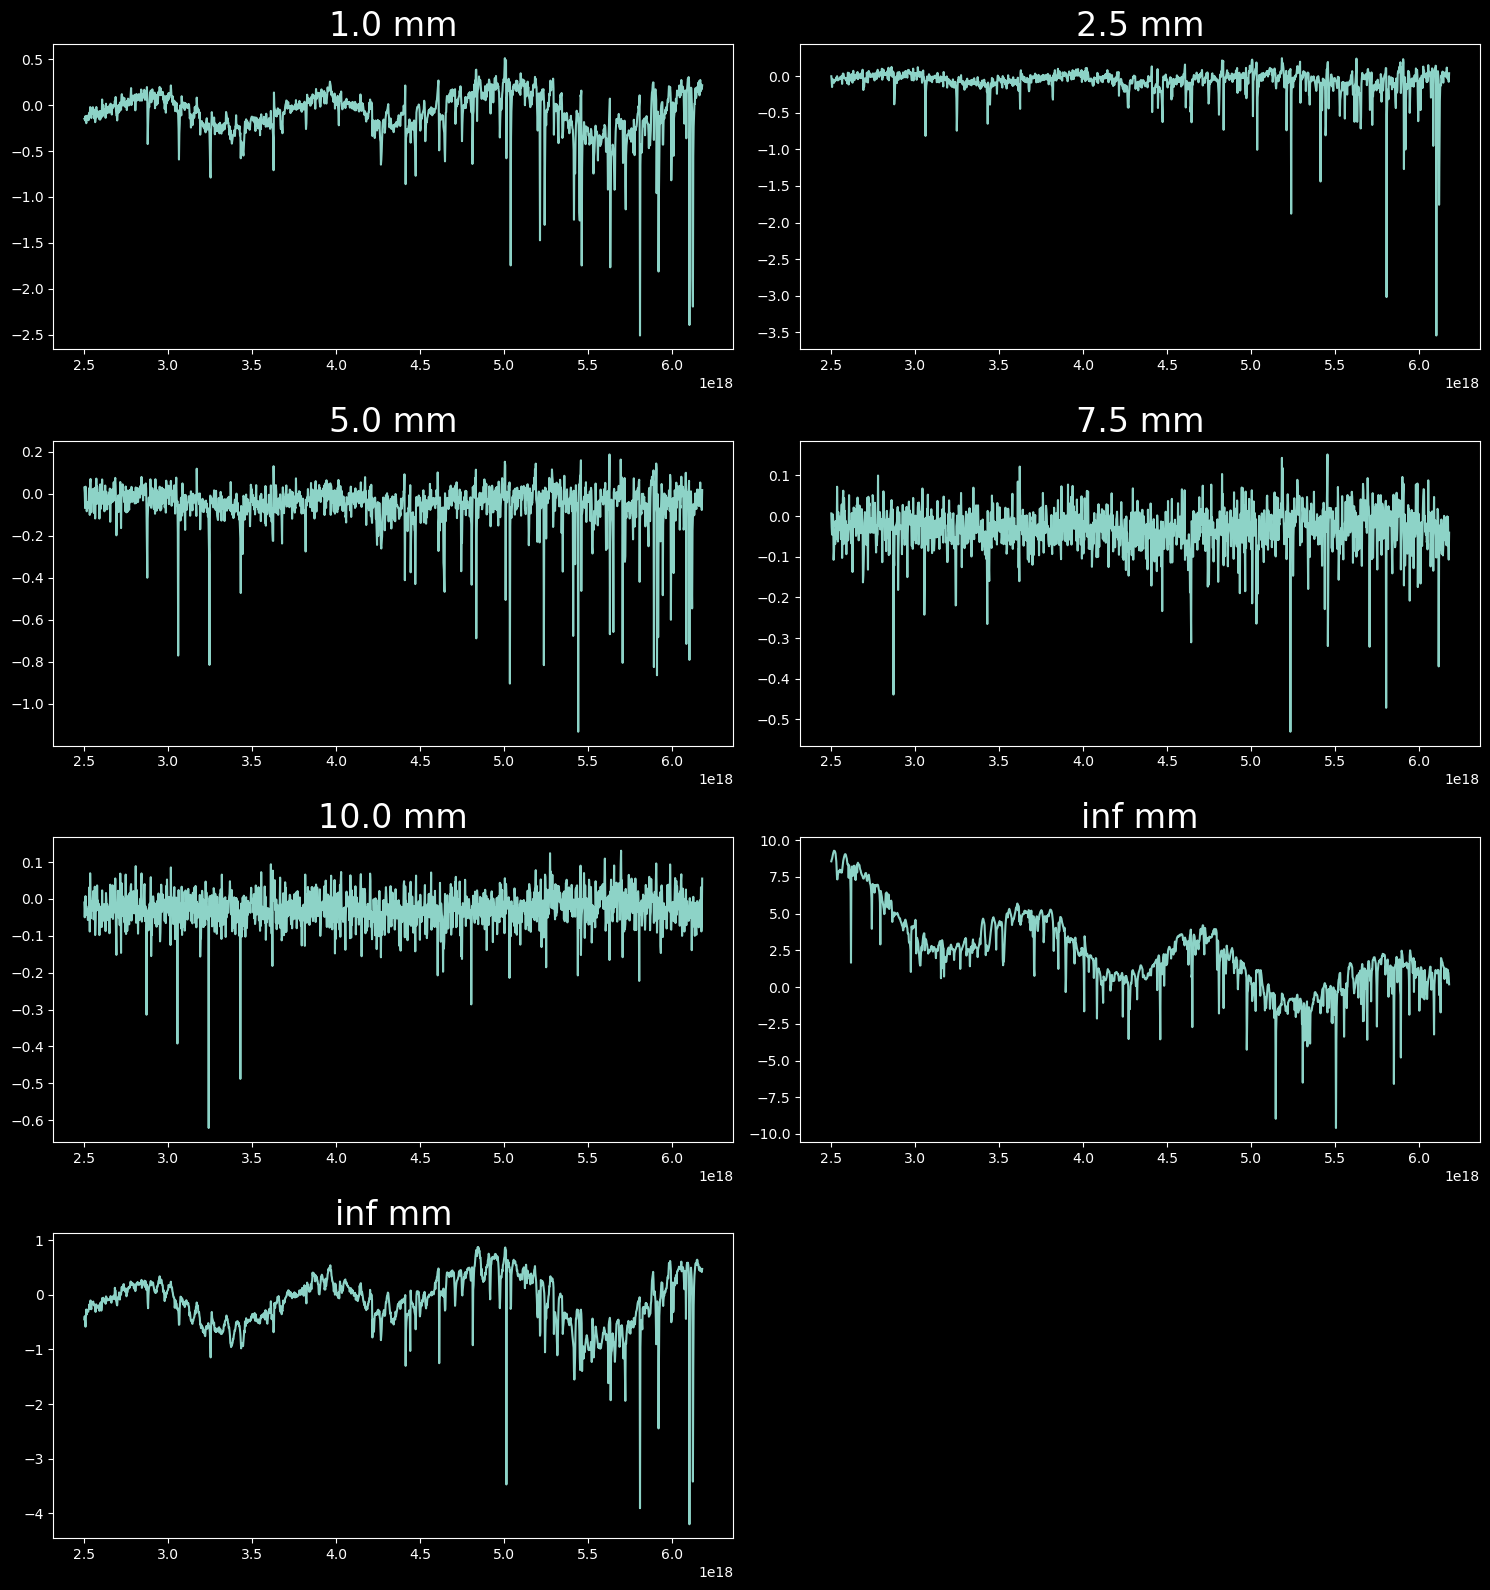

In [67]:
plot_distance_dict(rot3_dict)

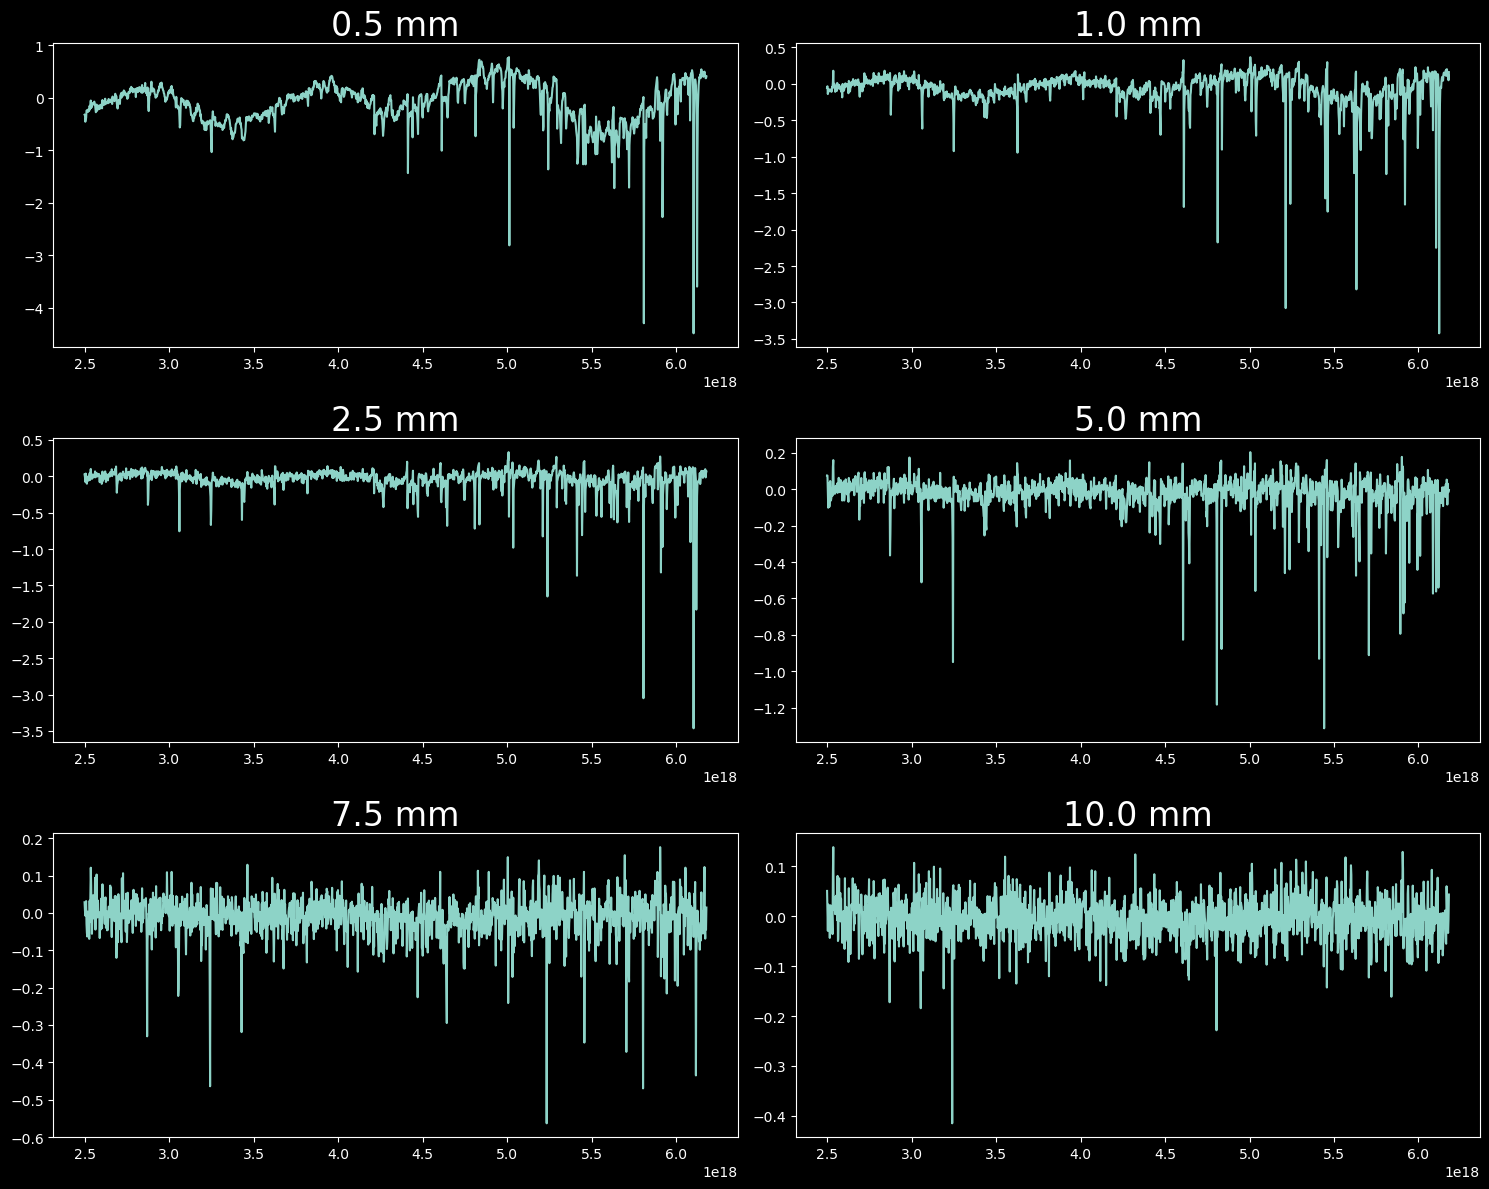

In [68]:
plot_distance_dict(rot1_1_dict)

In [34]:
rot1_dict_df = pd.DataFrame(testing_dict1)

In [40]:
rot1_dict_df

,0,1,2,3,4
distance [mm],1.0,2.5,5.0,7.5,10.0
freqs,"[2.5e+18, 2.5023e+18, 2.5046e+18, 2.5069e+18, ...","[2.5e+18, 2.5023e+18, 2.5046e+18, 2.5069e+18, ...","[2.5e+18, 2.5023e+18, 2.5046e+18, 2.5069e+18, ...","[2.5e+18, 2.5023e+18, 2.5046e+18, 2.5069e+18, ...","[2.5e+18, 2.5023e+18, 2.5046e+18, 2.5069e+18, ..."
baseline,"[-28.719504437909965, -28.781392842352695, -28...","[-28.719504437909965, -28.781392842352695, -28...","[-28.719504437909965, -28.781392842352695, -28...","[-28.719504437909965, -28.781392842352695, -28...","[-28.719504437909965, -28.781392842352695, -28..."
disk,"[-28.770754221874295, -28.813920308812037, -28...","[-28.693775266477687, -28.790785741155986, -28...","[-28.64437422933498, -28.706864966494713, -28....","[-28.691009283990027, -28.775263403682786, -28...","[-28.668642881878455, -28.767857005562245, -28..."
subtracted,"[-0.05124978396433022, -0.032527466459342236, ...","[0.025729171432278264, -0.009392898803291416, ...","[0.07513020857498631, 0.07452787585798148, -0....","[0.02849515391993762, 0.006129438669908893, -0...","[0.05086155603150999, 0.013535836790449451, -0..."


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

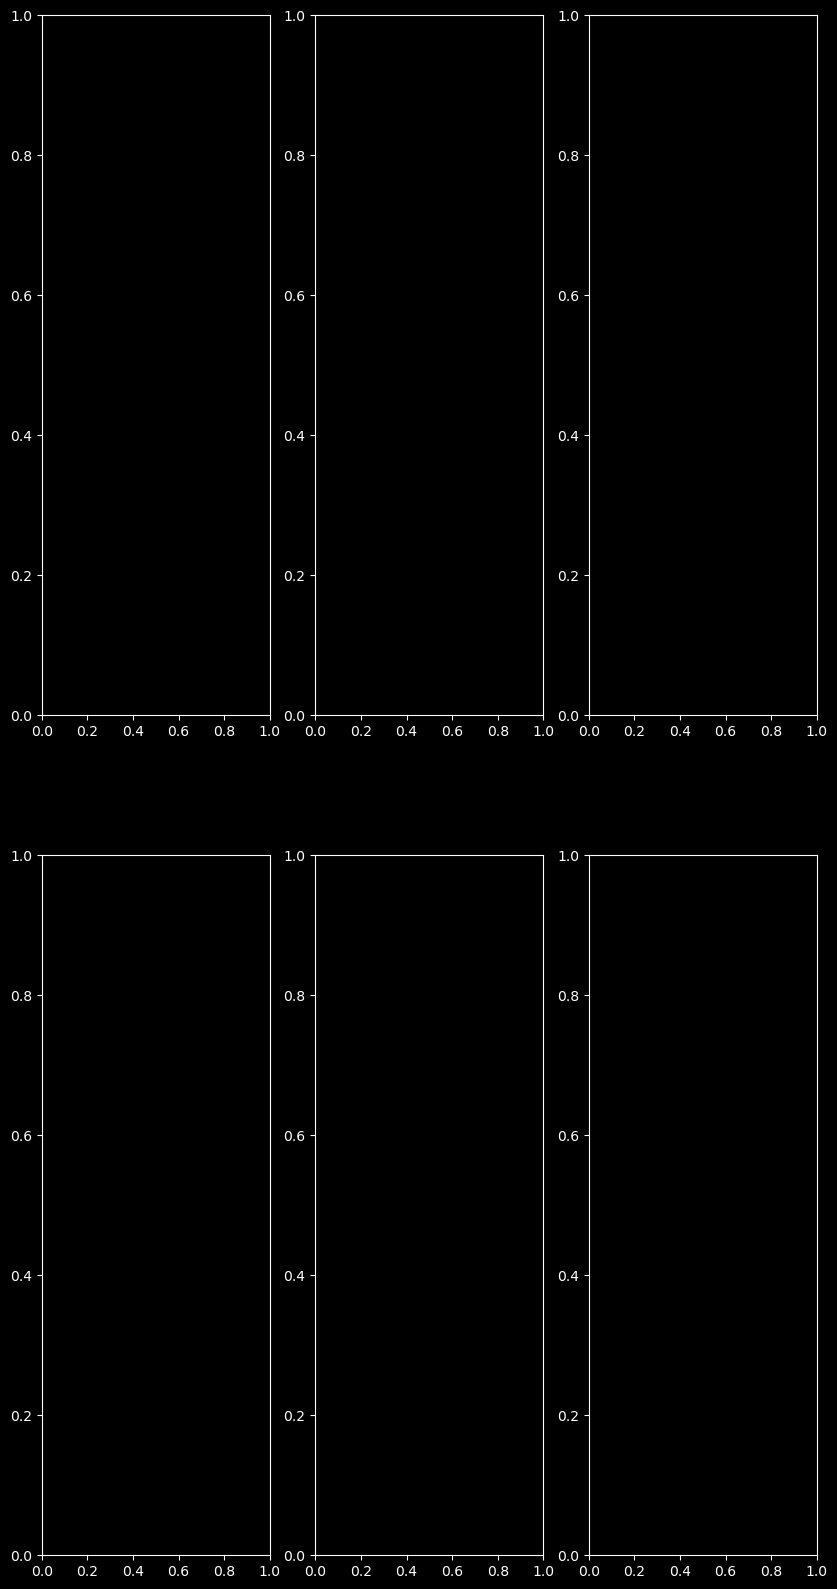

In [43]:
fig, ax = plt.subplots(2, 3, figsize = (10, 20))
for i in range(len(rot1_dict_df)):
    ax[i].plot(rot1_dict_df[i]['freqs'], rot1_dict_df[i]['subtracted'])